In [11]:
!pip install imblearn

     |████████████████████████████████| 206 kB 7.1 MB/s eta 0:00:01


In [1]:
!pip install optgbm

In [6]:
import time
import datetime

import numpy as np
import pandas as pd
import optgbm as lgb
from matplotlib import pyplot

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
features_target = ['target'] 

for feature in features_target:
    le = LabelEncoder()
    le.fit(train_df[feature])
    train_df[feature] = le.transform(train_df[feature])
    
print(train_df['target'].head())

0    5
1    5
2    1
3    7
4    1
Name: target, dtype: int64


In [5]:
from sklearn.model_selection import train_test_split
train_no_predict = train_df.drop(['id', 'target'], 1)
train_predict = train_df['target']

train_percent = 0.50

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, train_size=train_percent)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  100000
test count:  100000


Class=1, n=12215 (12.215%)
Class=6, n=7385 (7.385%)
Class=5, n=25906 (25.906%)
Class=8, n=12771 (12.771%)
Class=7, n=25881 (25.881%)
Class=2, n=7399 (7.399%)
Class=0, n=4559 (4.559%)
Class=4, n=1532 (1.532%)
Class=3, n=2352 (2.352%)


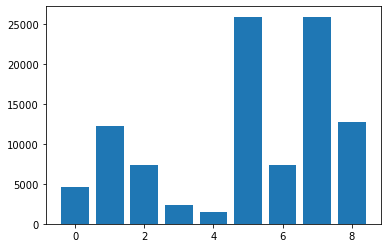

In [9]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

Class=1, n=25906 (11.111%)
Class=6, n=25906 (11.111%)
Class=5, n=25906 (11.111%)
Class=8, n=25906 (11.111%)
Class=7, n=25906 (11.111%)
Class=2, n=25906 (11.111%)
Class=0, n=25906 (11.111%)
Class=4, n=25906 (11.111%)
Class=3, n=25906 (11.111%)


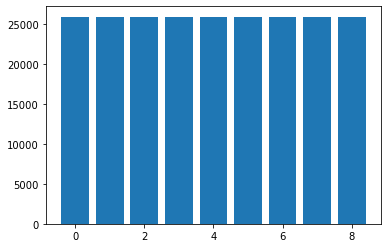

In [14]:
from collections import Counter
counter = Counter(y_smote)
for k,v in counter.items():
    per = v / len(y_smote) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Base Rate

In [15]:
print(datetime.datetime.now())
start = time.time()

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

minutes = (time.time() - start) / 60
print(round(minutes, 2))
print(datetime.datetime.now())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classifier=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[I 2021-06-28 16:56:01,616] A new study created in memory with name: no-name-5c2cf7d3-71e7-4c97-9cd9-48a458635cdb
Searching the best hyperparameters...


2021-06-28 16:56:01.598410


[I 2021-06-28 16:56:12,466] Trial 0 finished with value: 1.7640538370306023 and parameters: {'feature_fraction': 0.75, 'max_depth': 1, 'num_leaves': 2, 'min_data_in_leaf': 1590, 'lambda_l1': 7.52692284536581e-06, 'lambda_l2': 4.101645619004518e-08, 'bagging_fraction': 0.95, 'bagging_freq': 3}. Best is trial 0 with value: 1.7640538370306023.
[I 2021-06-28 16:56:39,471] Trial 1 finished with value: 1.7514865013895222 and parameters: {'feature_fraction': 0.4, 'max_depth': 5, 'num_leaves': 6, 'min_data_in_leaf': 92, 'lambda_l1': 9.293102525789044, 'lambda_l2': 9.13777752690237e-08, 'bagging_fraction': 0.6, 'bagging_freq': 10}. Best is trial 1 with value: 1.7514865013895222.
[I 2021-06-28 16:56:56,166] Trial 2 finished with value: 1.7546123230166812 and parameters: {'feature_fraction': 0.9, 'max_depth': 2, 'num_leaves': 4, 'min_data_in_leaf': 710, 'lambda_l1': 0.0008944607549710193, 'lambda_l2': 0.11650995381649218, 'bagging_fraction': 0.9, 'bagging_freq': 2}. Best is trial 1 with value: 1.

[I 2021-06-28 17:06:53,541] Trial 23 finished with value: 1.749499525256137 and parameters: {'feature_fraction': 0.15000000000000002, 'max_depth': 5, 'num_leaves': 21, 'min_data_in_leaf': 4567, 'lambda_l1': 1.4281142410156291, 'lambda_l2': 0.0045814673816446366, 'bagging_fraction': 0.9, 'bagging_freq': 7}. Best is trial 22 with value: 1.7491784255813159.
[I 2021-06-28 17:07:25,173] Trial 24 finished with value: 1.7517028375211119 and parameters: {'feature_fraction': 0.1, 'max_depth': 5, 'num_leaves': 23, 'min_data_in_leaf': 4220, 'lambda_l1': 0.5782187842942877, 'lambda_l2': 0.002211564584135919, 'bagging_fraction': 0.95, 'bagging_freq': 8}. Best is trial 22 with value: 1.7491784255813159.
[I 2021-06-28 17:08:00,168] Trial 25 finished with value: 1.749244034896376 and parameters: {'feature_fraction': 0.15000000000000002, 'max_depth': 5, 'num_leaves': 22, 'min_data_in_leaf': 3404, 'lambda_l1': 1.3472145840895045, 'lambda_l2': 0.4568207144985941, 'bagging_fraction': 0.9, 'bagging_freq': 

20.69
2021-06-28 17:16:43.121425


In [23]:
from sklearn.metrics import log_loss
test_preds = lgbm.predict_proba(X_test)
print(abs(log_loss(y_test, test_preds)))

1.7488895434947713


## SMOTE

In [17]:
print(datetime.datetime.now())
start = time.time()

smote_lgbm = lgb.LGBMClassifier()
smote_lgbm.fit(X_smote, y_smote)

minutes = (time.time() - start) / 60
print(round(minutes, 2))
print(datetime.datetime.now())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classifier=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[I 2021-06-28 17:17:25,483] A new study created in memory with name: no-name-dea5e8ec-53c3-44b5-be08-e4d89ebf943d
Searching the best hyperparameters...


2021-06-28 17:17:25.454010


[I 2021-06-28 17:19:01,222] Trial 0 finished with value: 2.0235637464335468 and parameters: {'feature_fraction': 0.6, 'max_depth': 5, 'num_leaves': 20, 'min_data_in_leaf': 11405, 'lambda_l1': 6.717955789505558, 'lambda_l2': 1.0124058281227153, 'bagging_fraction': 0.95, 'bagging_freq': 8}. Best is trial 0 with value: 2.0235637464335468.
[I 2021-06-28 17:20:37,179] Trial 1 finished with value: 1.862381457563798 and parameters: {'feature_fraction': 0.65, 'max_depth': 7, 'num_leaves': 93, 'min_data_in_leaf': 107, 'lambda_l1': 0.0008029571965182207, 'lambda_l2': 3.870598229515697e-08, 'bagging_fraction': 0.65, 'bagging_freq': 7}. Best is trial 1 with value: 1.862381457563798.
[I 2021-06-28 17:22:07,039] Trial 2 finished with value: 1.9725762858356248 and parameters: {'feature_fraction': 0.2, 'max_depth': 6, 'num_leaves': 51, 'min_data_in_leaf': 833, 'lambda_l1': 5.783139698421812, 'lambda_l2': 1.5309075628697684e-09, 'bagging_fraction': 0.75, 'bagging_freq': 1}. Best is trial 1 with value: 

[I 2021-06-28 17:48:16,936] Trial 23 finished with value: 1.9060506897637004 and parameters: {'feature_fraction': 0.65, 'max_depth': 7, 'num_leaves': 101, 'min_data_in_leaf': 280, 'lambda_l1': 0.1503969097825288, 'lambda_l2': 0.00043957793863865196, 'bagging_fraction': 0.5, 'bagging_freq': 3}. Best is trial 11 with value: 1.8081535559584068.
[I 2021-06-28 17:49:22,811] Trial 24 finished with value: 1.961504232865669 and parameters: {'feature_fraction': 0.9, 'max_depth': 6, 'num_leaves': 64, 'min_data_in_leaf': 1005, 'lambda_l1': 8.878498893589179e-06, 'lambda_l2': 5.377755051919323e-06, 'bagging_fraction': 0.55, 'bagging_freq': 6}. Best is trial 11 with value: 1.8081535559584068.
[I 2021-06-28 17:50:16,962] Trial 25 finished with value: 2.0139803519252104 and parameters: {'feature_fraction': 0.7000000000000001, 'max_depth': 5, 'num_leaves': 30, 'min_data_in_leaf': 5680, 'lambda_l1': 0.0017129936290766021, 'lambda_l2': 1.1065709770395325e-08, 'bagging_fraction': 0.65, 'bagging_freq': 3}

56.56
2021-06-28 18:13:58.882012


In [22]:
from sklearn.metrics import log_loss
test_preds = smote_lgbm.predict_proba(X_test)
print(abs(log_loss(y_test, test_preds)))

1.9655346358718062


## Class Weights

In [19]:
print(datetime.datetime.now())
start = time.time()

weights_lgbm = lgb.LGBMClassifier(class_weight='balanced')
weights_lgbm.fit(X_train, y_train)

minutes = (time.time() - start) / 60
print(round(minutes, 2))
print(datetime.datetime.now())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classifier=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
[I 2021-06-28 18:14:01,852] A new study created in memory with name: no-name-f6a4b1a2-4381-4c1f-91fe-8273232f5491
Searching the best hyperparameters...


2021-06-28 18:14:01.790174


[I 2021-06-28 18:14:21,932] Trial 0 finished with value: 2.0980962382935955 and parameters: {'feature_fraction': 0.6, 'max_depth': 3, 'num_leaves': 6, 'min_data_in_leaf': 2214, 'lambda_l1': 3.659134149662969e-08, 'lambda_l2': 0.42002459992168883, 'bagging_fraction': 0.5, 'bagging_freq': 9}. Best is trial 0 with value: 2.0980962382935955.
[I 2021-06-28 18:14:52,308] Trial 1 finished with value: 2.1053018206823935 and parameters: {'feature_fraction': 0.30000000000000004, 'max_depth': 1, 'num_leaves': 2, 'min_data_in_leaf': 19960, 'lambda_l1': 0.31468143341963783, 'lambda_l2': 0.04882414078648688, 'bagging_fraction': 0.9, 'bagging_freq': 7}. Best is trial 0 with value: 2.0980962382935955.
[I 2021-06-28 18:15:16,440] Trial 2 finished with value: 2.1015623789133615 and parameters: {'feature_fraction': 0.6, 'max_depth': 7, 'num_leaves': 120, 'min_data_in_leaf': 429, 'lambda_l1': 0.0009076988625010213, 'lambda_l2': 0.2730815002132185, 'bagging_fraction': 0.8500000000000001, 'bagging_freq': 10

[I 2021-06-28 18:23:11,229] Trial 23 finished with value: 2.09539042816576 and parameters: {'feature_fraction': 0.7000000000000001, 'max_depth': 3, 'num_leaves': 8, 'min_data_in_leaf': 9109, 'lambda_l1': 8.128464839366091e-06, 'lambda_l2': 4.2061405139439896e-07, 'bagging_fraction': 0.8, 'bagging_freq': 4}. Best is trial 19 with value: 2.094766731840765.
[I 2021-06-28 18:23:35,858] Trial 24 finished with value: 2.0965068860752134 and parameters: {'feature_fraction': 0.9, 'max_depth': 2, 'num_leaves': 4, 'min_data_in_leaf': 12841, 'lambda_l1': 3.33889416118e-08, 'lambda_l2': 1.1056802731730287e-08, 'bagging_fraction': 0.8500000000000001, 'bagging_freq': 4}. Best is trial 19 with value: 2.094766731840765.
[I 2021-06-28 18:24:05,557] Trial 25 finished with value: 2.0948383686305307 and parameters: {'feature_fraction': 0.85, 'max_depth': 3, 'num_leaves': 7, 'min_data_in_leaf': 10652, 'lambda_l1': 1.0150039843549595e-05, 'lambda_l2': 6.105298277218854e-09, 'bagging_fraction': 0.9, 'bagging_

16.33
2021-06-28 18:30:21.835882


In [21]:
from sklearn.metrics import log_loss
test_preds = weights_lgbm.predict_proba(X_test)
print(abs(log_loss(y_test, test_preds)))

2.0341957159223942
